<a href="https://colab.research.google.com/github/sairam-peduri/COE/blob/main/7mar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
def LinearRegression(x,y):
    xm=np.mean(x)
    ym=np.mean(y)
    num=0
    den=0
    n=len(x)

    for i in range(n):
        num+=(x[i]-xm)*(y[i]-ym)
        den+=(x[i]-xm)**2
    m=num/den
    c=ym-m*xm
    return m,c


x=[1,2,3,4,5]
y=[3,4,2,4,5]




m,c=LinearRegression(x,y)
print(f"y = {m}x + {c}")

y = 0.4x + 2.4


In [ ]:
def predict(x_new, m, c):
    return m * x_new + c

x_new = 6
y_p = predict(x_new, m, c)

print(f"Predicted y for x = {x_new}: {y_p}")


Predicted y for x = 6: 4.800000000000001


In [ ]:
ym=np.mean(y)
r2=1-((sum(y_p-ym)**2)/(sum(y-ym)**2))
print(f"r2 = {r2}")

TypeError: 'numpy.float64' object is not iterable

In [ ]:


def r2score(y,y_p):
    ym=np.mean(y)
    print(ym)
    num=0
    den=0
    for i in range(len(y)):
        num+=(y_p-ym)**2
        den+=(y-ym)**2
    return num/den

print(f"r2 score : ",r2score(y,y_p))


TypeError: 'numpy.float64' object is not iterable

In [ ]:
import pandas as pd
df=pd.read_csv("headbrain.csv")
df.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [ ]:
df.size

948

In [ ]:
df.isna().sum()

,0
Gender,0
Age Range,0
Head Size(cm^3),0
Brain Weight(grams),0


In [ ]:
import numpy as np
def LR(x,y):
    xm=np.mean(x)
    ym=np.mean(y)
    num=0
    den=0
    n=len(x)

    for i in range(n):
        num+=(x[i]-xm)*(y[i]-ym)
        den+=(x[i]-xm)**2
    m=num/den
    c=ym-m*xm
    return m,c

In [ ]:
x=df['Head Size(cm^3)']
y=df['Brain Weight(grams)']
m,c=LR(x,y)
print(f"y = {m}x + {c}")

y = 0.26342933948939945x + 325.57342104944223


In [ ]:
def pred(x_new, m, c):
    return m * x_new + c

x_new = 6
y_p = pred(x_new, m, c)

print(f"Predicted y for x = {x_new}: {y_p}")


Predicted y for x = 6: 327.15399708637864


Dataset (first 5 rows):
    MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Price  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null 

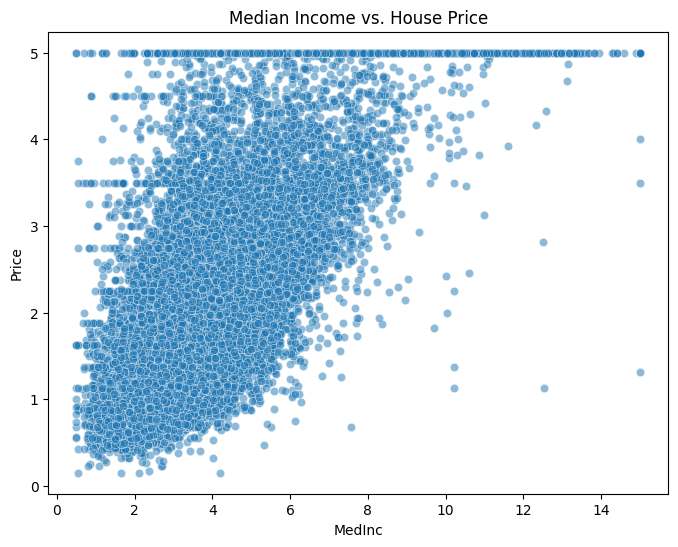

In [ ]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
import numpy as np  # For handling numerical data
import matplotlib.pyplot as plt  # For data visualization
from sklearn.linear_model import LinearRegression  # For building the regression model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score  # For evaluating the model
import statsmodels.api as sm  # For OLS (Ordinary Least Squares) Regression
import seaborn as sns

#Step-1 Load the dataset
california = fetch_california_housing()
df = pd.DataFrame(california.data, columns=california.feature_names)
df['Price'] = california.target
print("Dataset (first 5 rows):\n",df.head())

#Step-2 EDA
print("\n Data Info:\n",df.info())
print("\nSummary Statistics:\n",df.describe())

df.isnull().sum()

plt.figure(figsize=(8,6))
sns.scatterplot(x='MedInc',y='Price',data=df,alpha=0.5)
plt.title('Median Income vs. House Price')
plt.show()

In [16]:
print("\nCorrelation",df.corr()['Price'].sort_values())


Correlation Latitude     -0.144160
AveBedrms    -0.046701
Longitude    -0.045967
Population   -0.024650
AveOccup     -0.023737
HouseAge      0.105623
AveRooms      0.151948
MedInc        0.688075
Price         1.000000
Name: Price, dtype: float64


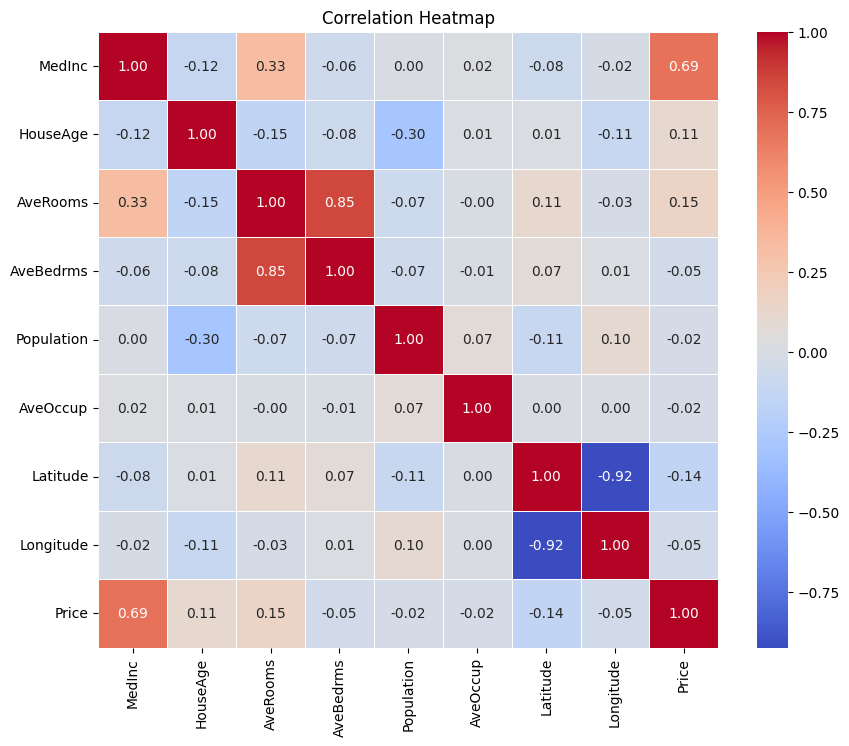

In [18]:
corr_matrix=df.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',
            fmt='.2f',linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [22]:
#prepare Data
from sklearn.model_selection import train_test_split
x=df[['MedInc']] # Reshape x to a 2D array using double brackets
y=df['Price']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [23]:
model=LinearRegression()
model.fit(x_train,y_train)
print(f"\nLinear Regression Price:\n{model.coef_[0]:.2f}*medInc+{model.intercept_:.2f}")


Linear Regression Price:
0.42*medInc+0.44


In [24]:
y_pred=model.predict(x_test)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
r2=r2_score(y_test,y_pred)
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Absolute Error: 0.63
Root Mean Squared Error: 0.84
R-squared: 0.46


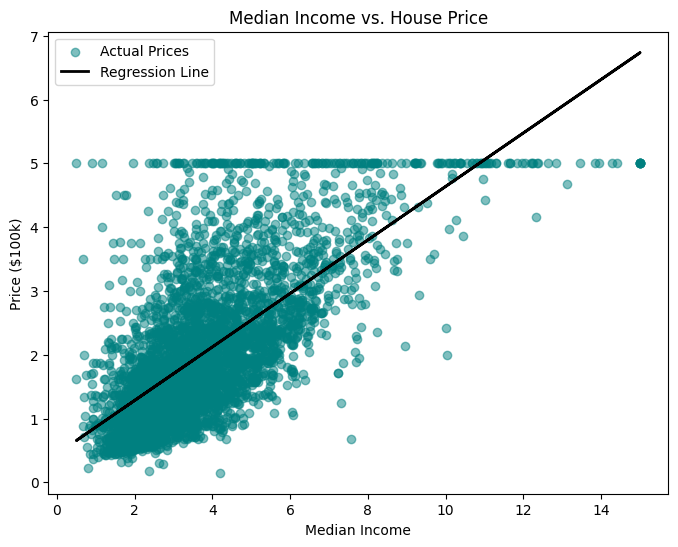

In [26]:
# Visualize
plt.figure(figsize=(8,6))
plt.scatter(x_test, y_test, color='teal', label='Actual Prices',alpha=0.5)
plt.plot(x_test, y_pred, color='black', linewidth=2, label='Regression Line')
plt.xlabel('Median Income')
plt.ylabel('Price ($100k)')
plt.title('Median Income vs. House Price')
plt.legend()
plt.show()

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


california = fetch_california_housing()


df = pd.DataFrame(california.data, columns=california.feature_names)
df['Price'] = california.target


X = df.drop('Price', axis=1)
y = df['Price']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 0.5558915986952444
R-squared: 0.5757877060324508


In [2]:
residuals=y_test-y_pred
print("\n First few Residuals:")
print(residuals.head())


 First few Residuals:
20046   -0.242123
3024    -1.306017
15663    2.290351
20484   -0.652926
9814     0.175343
Name: Price, dtype: float64


Text(0.5, 1.0, 'Residual Plot')

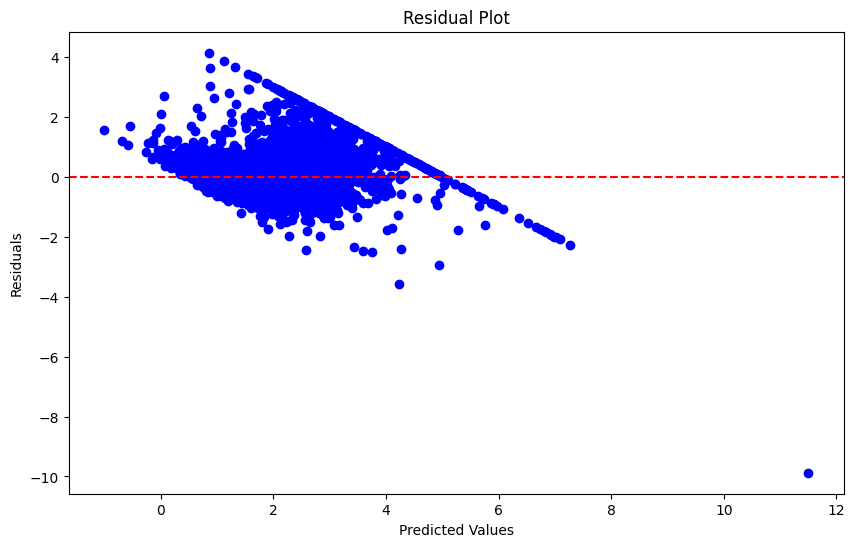

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
plt.scatter(y_pred,residuals,color='blue',marker='o')
plt.axhline(y=0,color='red',linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')

AttributeError: Rectangle.set() got an unexpected keyword argument 'kde'

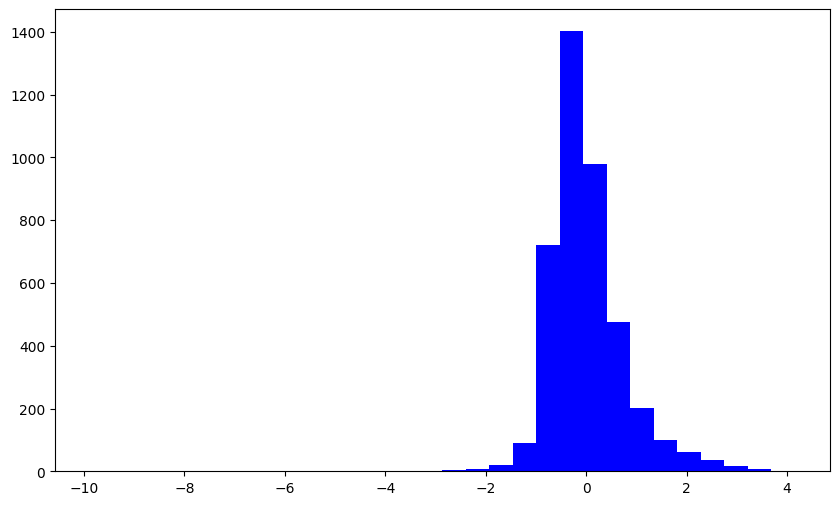

In [8]:
plt.figure(figsize=(10,6))
plt.hist(residuals,bins=30,kde=True,color='blue')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')

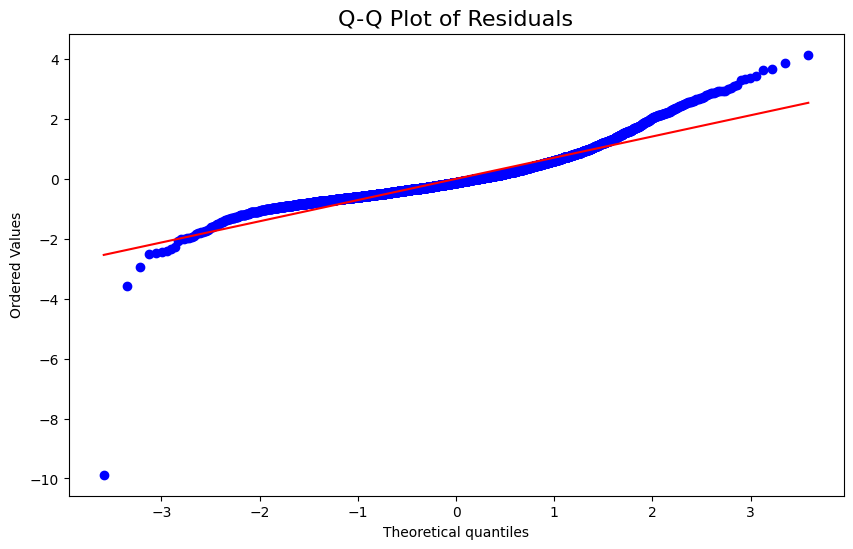

In [9]:
import scipy.stats as stats
plt.figure(figsize=(10,6))
stats.probplot(residuals,dist="norm",plot=plt)
plt.title('Q-Q Plot of Residuals',fontsize=16)
plt.show()

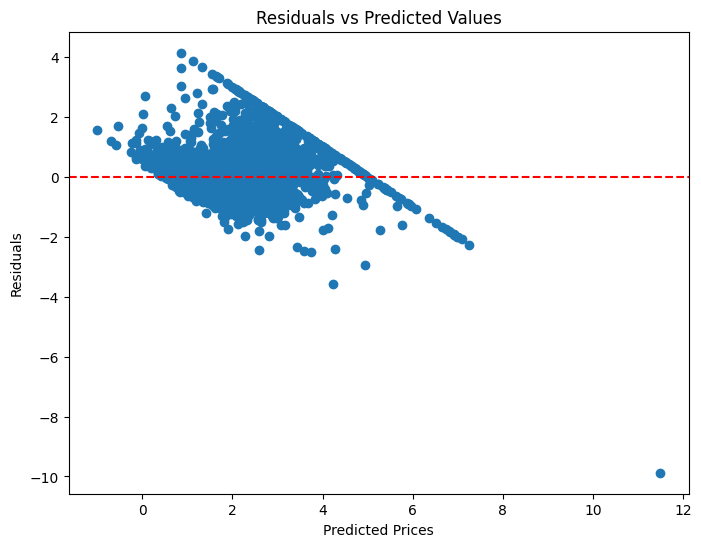

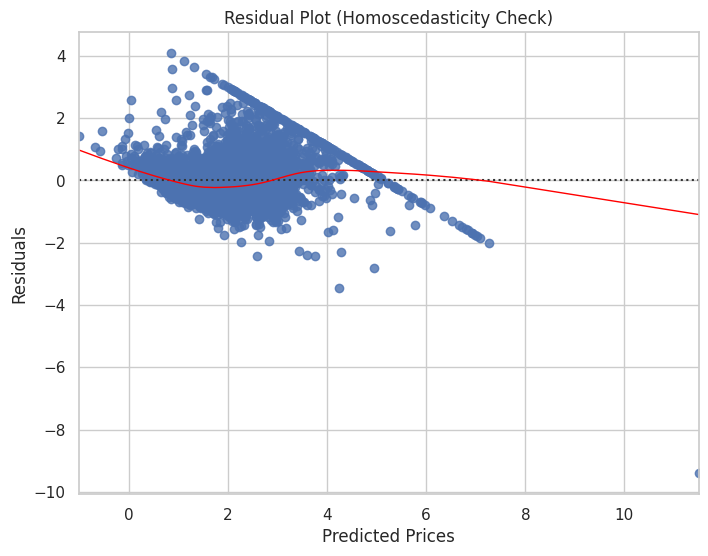

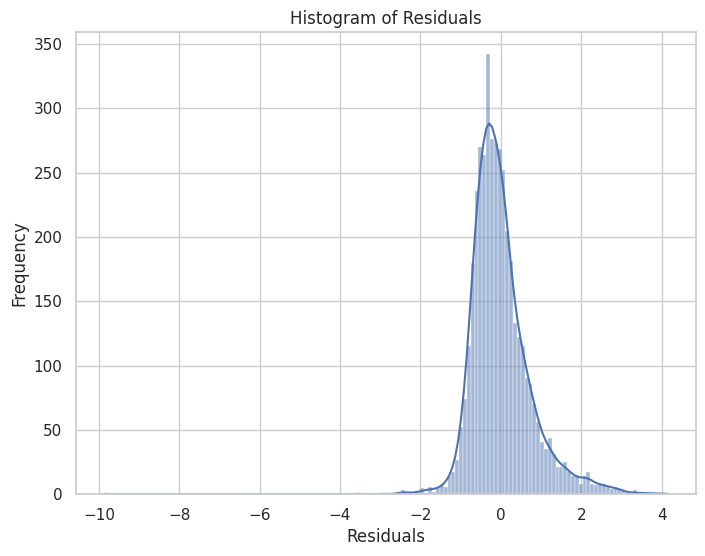

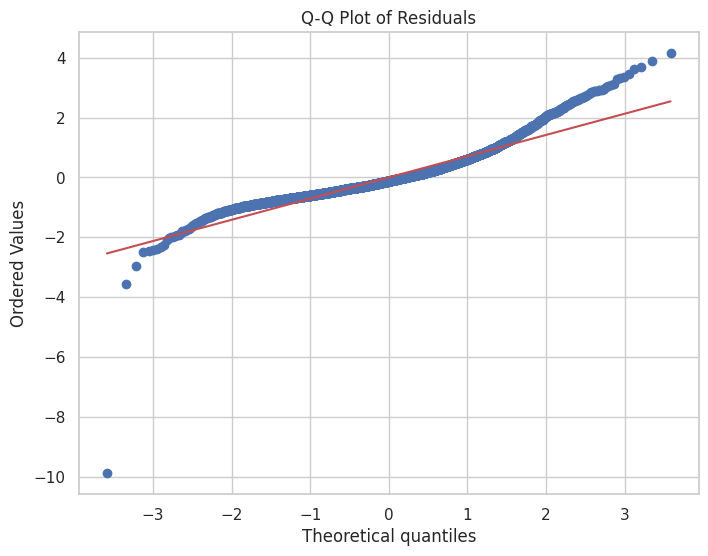

In [10]:
# 1. Linearity - Scatter plot of residuals vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.show()

# 2. Constant Variance - Check for homoscedasticity
sns.set(style='whitegrid')
plt.figure(figsize=(8, 6))
sns.residplot(x=y_pred, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.title('Residual Plot (Homoscedasticity Check)')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.show()

# 3. Normality - Histogram of residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Q-Q plot for normality
plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

In [11]:
import pandas as pd
import numpy as np
data=pd.read_csv("black-friday.csv")
data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [14]:
print(data.isnull().sum())

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64


In [15]:
data['Product_Category_2'].fillna(data['Product_Category_2'].mean(), inplace=True)
data['Product_Category_3'].fillna(data['Product_Category_3'].mean(), inplace=True)

<ipython-input-15-c2dcf92e5ffc>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Product_Category_2'].fillna(data['Product_Category_2'].mean(), inplace=True)
<ipython-input-15-c2dcf92e5ffc>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].meth

In [16]:
print(data.isnull().sum())

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64


            User_ID     Occupation  Marital_Status  Product_Category_1  \
count  5.500680e+05  550068.000000   550068.000000       550068.000000   
mean   1.003029e+06       8.076707        0.409653            5.404270   
std    1.727592e+03       6.522660        0.491770            3.936211   
min    1.000001e+06       0.000000        0.000000            1.000000   
25%    1.001516e+06       2.000000        0.000000            1.000000   
50%    1.003077e+06       7.000000        0.000000            5.000000   
75%    1.004478e+06      14.000000        1.000000            8.000000   
max    1.006040e+06      20.000000        1.000000           20.000000   

       Product_Category_2  Product_Category_3       Purchase  
count       550068.000000       550068.000000  550068.000000  
mean             9.842329           12.668243    9263.968713  
std              4.207852            2.271830    5023.065394  
min              2.000000            3.000000      12.000000  
25%              8

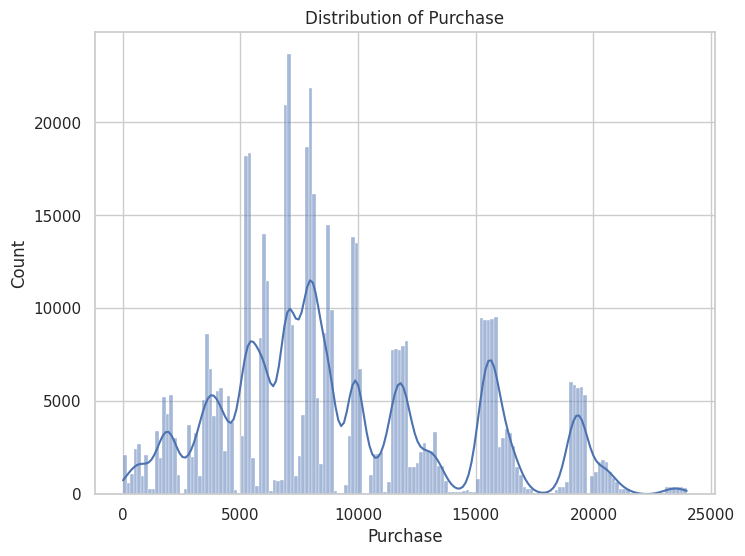

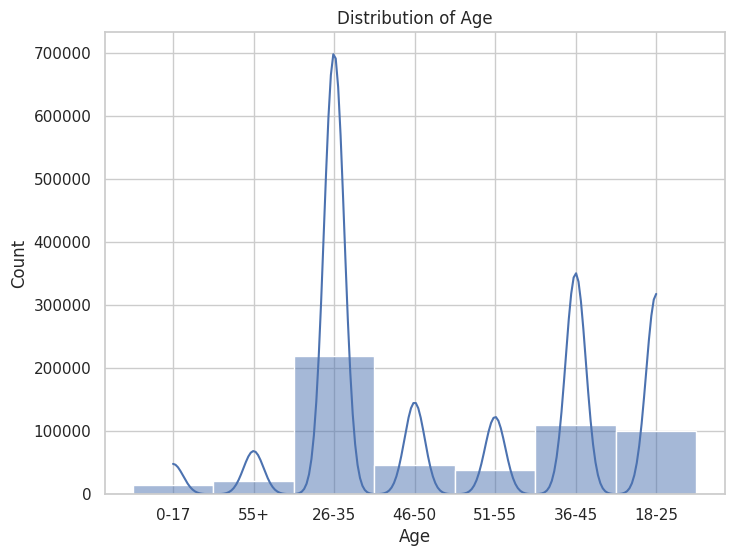

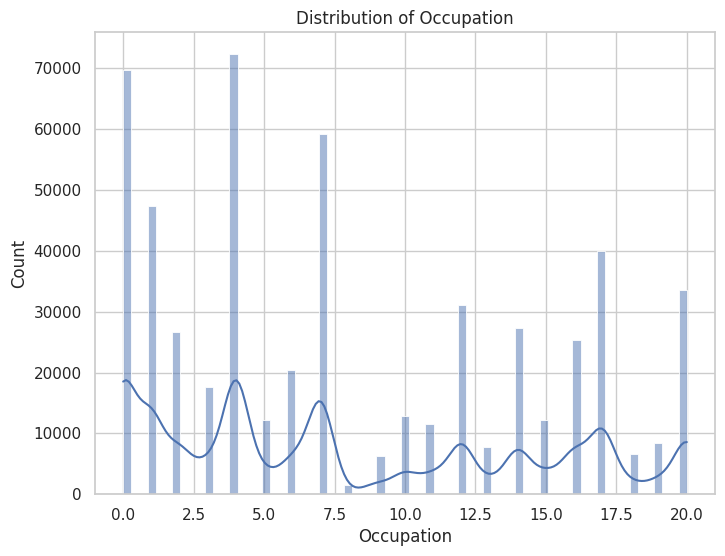

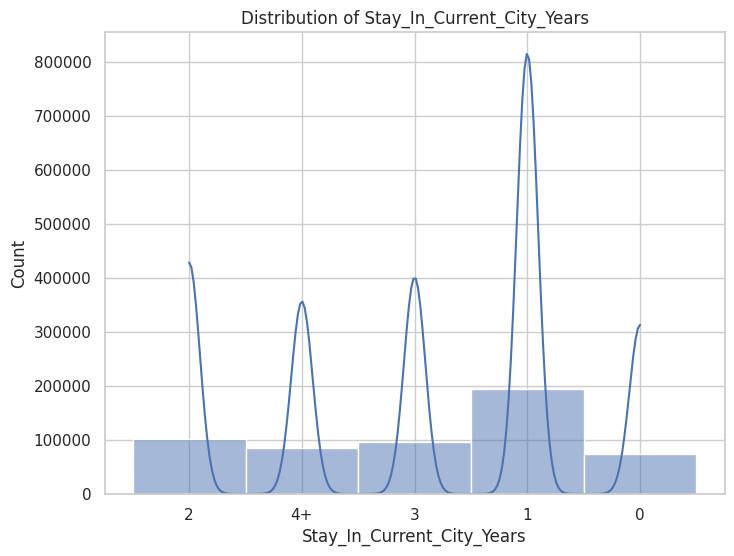

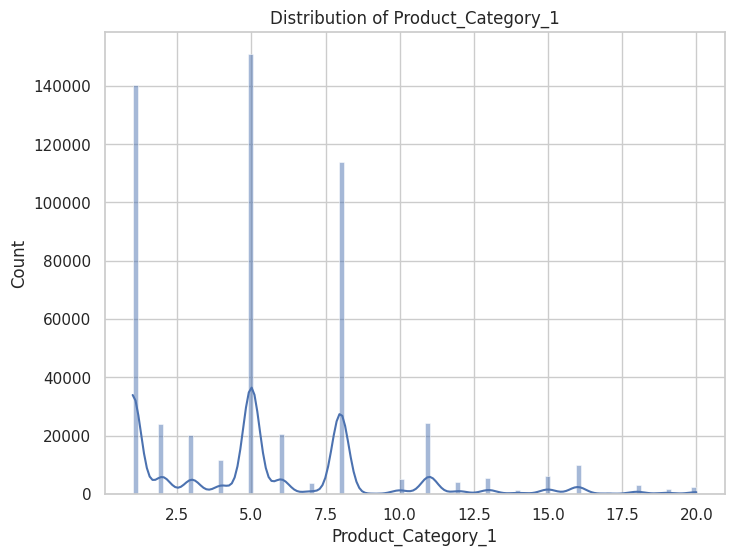

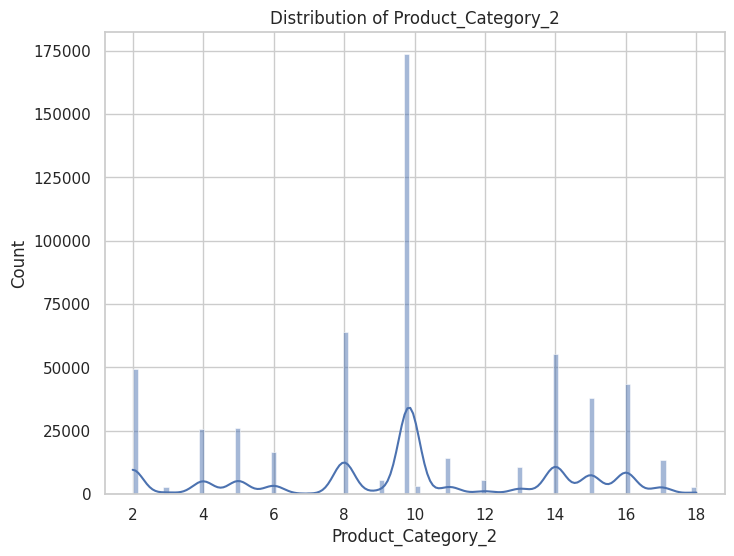

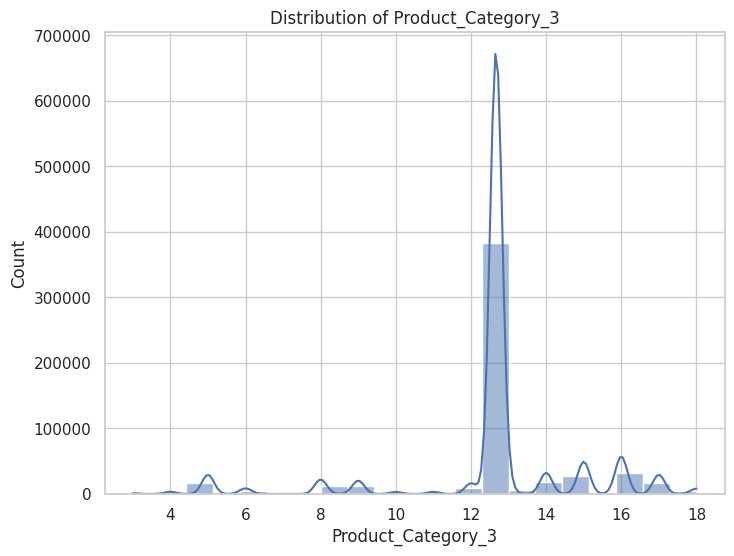

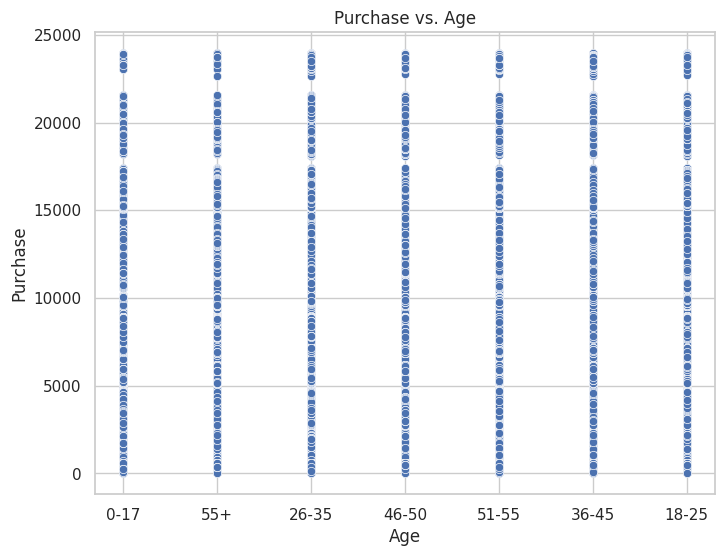

AttributeError: 'list' object has no attribute 'corr'

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

print(data.describe())

print(data.info())
print(data.isnull().sum())

numerical_features = ['Purchase', 'Age', 'Occupation', 'Stay_In_Current_City_Years', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3']

for col in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Purchase', data=data)
plt.title('Purchase vs. Age')
plt.show()

correlation_matrix = numerical_features.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

categorical_features = ['Gender', 'City_Category', 'Marital_Status']

for col in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=col, y='Purchase', data=data)
    plt.title(f'Purchase Distribution across {col}')
    plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='Marital_Status', y='Purchase', hue='Gender', data=data)
plt.title('Purchase by Marital Status and Gender')
plt.show()


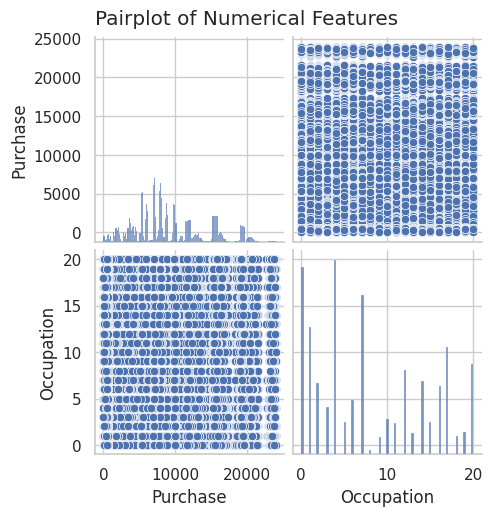

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


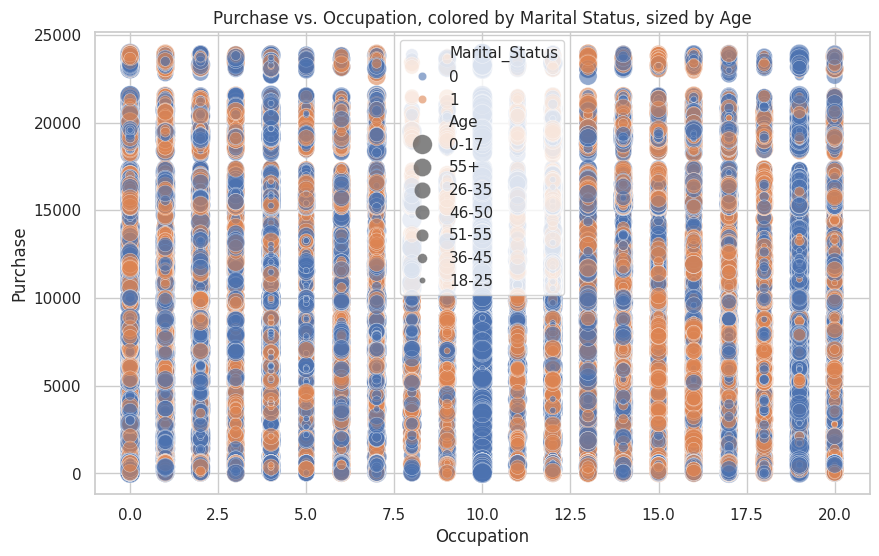

In [21]:

import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(data[['Purchase', 'Age', 'Occupation', 'Stay_In_Current_City_Years']])
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Occupation', y='Purchase', hue='Marital_Status', size='Age', data=data, sizes=(20, 200), alpha=0.6)
plt.title('Purchase vs. Occupation, colored by Marital Status, sized by Age')
plt.show()


In [23]:
import pandas as pd

from sklearn.feature_selection import SelectKBest, f_regression

selector = SelectKBest(score_func=f_regression, k=5)
X_selected = selector.fit_transform(X, y)

selected_feature_indices = selector.get_support(indices=True)

selected_feature_names = X.columns[selected_feature_indices].tolist()

print(f"Selected feature indices: {selected_feature_indices}")
print(f"Selected feature names: {selected_feature_names}")

X_selected_df = pd.DataFrame(X_selected, columns=selected_feature_names)


Selected feature indices: [0 1 2 3 6]
Selected feature names: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Latitude']
